In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from mpl_toolkits.mplot3d import Axes3D



In [2]:
cancer = load_breast_cancer()

In [3]:
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
print (cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [5]:
features = pd.DataFrame(cancer.data, columns = cancer.feature_names)
target = pd.DataFrame(cancer.target, columns = ['target'])

In [6]:
df = pd.concat([features,target], axis = 1)

In [7]:
df.head(10)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440,0
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.1932,0.3063,0.08368,0
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.1556,0.3196,0.11510,0
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.2060,0.4378,0.10720,0
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.2210,0.4366,0.20750,0


In [8]:
correlation = df.corr('pearson')

In [9]:
abs(correlation['target'].sort_values())

worst concave points       0.793566
worst perimeter            0.782914
mean concave points        0.776614
worst radius               0.776454
mean perimeter             0.742636
worst area                 0.733825
mean radius                0.730029
mean area                  0.708984
mean concavity             0.696360
worst concavity            0.659610
mean compactness           0.596534
worst compactness          0.590998
radius error               0.567134
perimeter error            0.556141
area error                 0.548236
worst texture              0.456903
worst smoothness           0.421465
worst symmetry             0.416294
mean texture               0.415185
concave points error       0.408042
mean smoothness            0.358560
mean symmetry              0.330499
worst fractal dimension    0.323872
compactness error          0.292999
concavity error            0.253730
fractal dimension error    0.077972
symmetry error             0.006522
texture error              0

In [10]:
x = df['worst concave points']
z = df['worst perimeter']
y = df['target'] ##Data Preprocesing

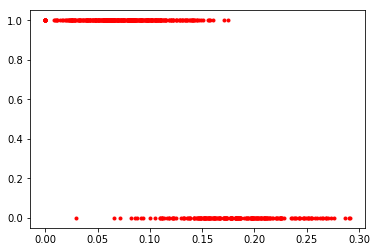

In [11]:
plt.plot(x,y,'r.')  #data visualisation

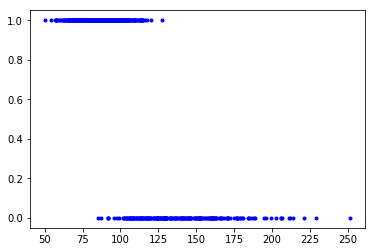

In [12]:
plt.plot(z,y,'b.')

In [13]:
x = np.array(x)
y = np.array(y)
z = np.array(z)

In [14]:
x = (x - x.min())/(x.max() - x.min())
z = (z - z.min())/(z.max() - z.min())


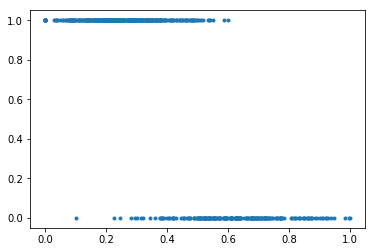

In [15]:
plt.plot(x,y,'.')

In [16]:
x_train,x_test,y_train,y_test,z_train,z_test = train_test_split(x,y,z,test_size = 0.25)

In [17]:
def hypothesis(a,x,b,z,c):
    return(1/(1 + np.exp(-(a*x+b*z+c))))

In [18]:
def error(a,x,b,z,c,y):
    
    e = 0
    m = len(x)
    for i in range(m):
      
        e += -(y[i]*np.log(hypothesis(a,x[i],b,z[i],c))) - ((1 - y[i])*np.log(1-hypothesis(a,x[i],b,z[i],c)))
    return (1/m)*e

In [19]:
def step_gradient(a,x,b,z,c,y,learning_rate):
    grad_a = 0
    grad_b = 0
    grad_c = 0
    m = len(x)
    
    for i in range(m):
        grad_a += (hypothesis(a,x[i],b,z[i], c) - y[i])*x[i]
        grad_b += (hypothesis(a,x[i],b,z[i],c) - y[i])*z[i]
        grad_c += (hypothesis(a,x[i],b,z[i],c) - y[i])
        
        
    a = a- (grad_a * learning_rate)
    b = b-(grad_b * learning_rate)
    c = c-(grad_c * learning_rate)
    
    return a,b,c

In [20]:
def descend(int_a,x,init_b,z,init_c,y,learning_rate,iterations):
    a = init_a
    b = init_b
    c = init_c
    
    
    for i in range(iterations):
        e = error(a,x,b,z,c,y)
        if i%1000==0:
            print(f"error{e},a:{a},b:{b},c: {c}")
                  
        a,b,c = step_gradient(a,x,b,z,c,y,learning_rate)
                  
    return a,b,c

In [21]:
init_a = -11.750981596776606
init_b =-28.96830618395619
init_c = 13.821437493079927
iterations = 10000
learning_rate = 0.01

In [22]:
final_a,final_b ,final_c = descend(init_a,x_train,init_b,z_train,init_c,y_train,learning_rate,iterations)

error0.1420177696426247,a:-11.750981596776606,b:-28.96830618395619,c: 13.821437493079927
error0.1409556922605644,a:-12.009953042761921,b:-27.082494869994775,c: 13.475282768711939
error0.1405904189528852,a:-11.986844858523002,b:-25.89822293566934,c: 13.117984021750386
error0.14044325092391197,a:-11.942199628601587,b:-25.151896230678425,c: 12.879687413917793
error0.14038694803173765,a:-11.91287771388835,b:-24.69095953699686,c: 12.73184056194934
error0.14036619207447124,a:-11.8961593992866,b:-24.411045449006362,c: 12.642578575061863
error0.14035871820147933,a:-11.886822413920296,b:-24.24300897574018,c: 12.589317272930009
error0.14035606554068938,a:-11.881561477044952,b:-24.142867876704617,c: 12.557715698886067
error0.14035513221734294,a:-11.878557064693437,b:-24.083454983466456,c: 12.539020263733173
error0.14035480554079902,a:-11.876822139434669,b:-24.04830044117059,c: 12.527977758825283


In [23]:
error(final_a,x_train,final_b,z_train,final_c,y_train)

0.14035469155332742

In [24]:
error(final_a,x_test,final_b,z_test,final_c,y_test)

0.10879917271668789

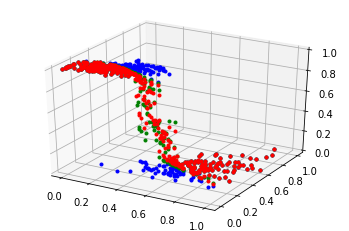

In [25]:

ax = plt.axes(projection='3d')
ax.plot3D(x_train,z_train, y_train,'b.')
ax.plot3D(x_train,z_train, hypothesis(init_a,x_train,init_b,z_train,init_c),'g.')
ax.plot3D(x_train,z_train, hypothesis(final_a,x_train,final_b,z_train,final_c),'r.')


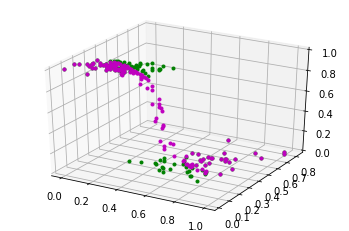

In [26]:
ax = plt.axes(projection='3d')
ax.plot3D(x_test,z_test, y_test,'g.')
ax.plot3D(x_test,z_test, hypothesis(final_a,x_test,final_b,z_test,final_c),'m.')


In [27]:
def accuracy(a,x,b,z,c,y):
    correct = 0
    m = len(x)
   
    
    for i in range(m):
     
        pred =  hypothesis(a,x[i],b,z[i],c)
       
        if pred >= 0.5:
           d = 1
        else:
            d =  0
            
        if d == y[i]:
            correct+=1
        
        
        
        
        
            
    print(f"Accuracy: {correct/len(y)}")

In [28]:
accuracy(final_a,x_train,final_b,z_train,final_c,y_train)

Accuracy: 0.9413145539906104


In [29]:
accuracy(final_a, x_test,final_b,z_train,final_c,y_test)

Accuracy: 0.6993006993006993
